## Report: Correlation between Temperature Change and Food prices Inflation


### Contents:

1. Introduction
2. Data Source
3. Load the Data
4. Answering questions
    - Question 1 and Inference 1
    - Question 2 and Inference 2
    - Question 3 and Inference 3
5. Conclusion
6. Questions for further research

## 1. Introduction

- How the temperature and the food prices inflation changes through the years?
- What is the correlation between temperature change and food prices inflation globally?
- What is the correlation between temperature change and food prices inflation for each country separately?


## 2. Datasources


### Datasource1: World Bank

- Metadata URL 1: https://microdata.worldbank.org/index.php/catalog/4509/pdf-documentation
- Data URL 1: https://microdata.worldbank.org/index.php/catalog/4509/download/65297
- Data Type: CSV
- Monthly food price inflation estimates by 25 Countries

### Datasource2: FAOSTAT

- Metadata URL 2: http://www.fao.org/faostat/en/#data/ET/metadata
- Data URL 2: https://fenixservices.fao.org/faostat/static/bulkdownloads/Environment_Temperature_change_E_All_Data.zip
- Data Type: CSV
- The FAOSTAT Temperature Data

## 3. Load the Data
Creating pandas dataframes using the local sqlite file, and merging the dataframes together into one.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
# get data from temperature table
temp_df = pd.read_sql_table('temperature', 'sqlite:///zylesto.sqlite')
# print first 5 rows of the table
temp_df.head()

,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1961F,...,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F,Y2022,Y2022F
0,2,'004,Afghanistan,7001,January,7271,Temperature change,°C,0.756,E,...,2.051,E,2.858,E,-0.681,E,0.559,E,2.284,E
1,2,'004,Afghanistan,7001,January,6078,Standard Deviation,°C,1.964,E,...,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E
2,2,'004,Afghanistan,7002,February,7271,Temperature change,°C,-1.766,E,...,2.714,E,0.067,E,2.500,E,4.086,E,2.371,E
3,2,'004,Afghanistan,7002,February,6078,Standard Deviation,°C,2.602,E,...,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E
4,2,'004,Afghanistan,7003,March,7271,Temperature change,°C,0.458,E,...,4.533,E,0.293,E,0.555,E,2.480,E,3.598,E


In [3]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Columns: 132 entries, Area Code to Y2022F
dtypes: float64(62), int64(3), object(67)
memory usage: 9.7+ MB


In [4]:
# check if data contains missing values
temp_df.isna().sum().sort_values()

Area Code             0
Area Code (M49)       0
Area                  0
Months Code           0
Months                0
                   ... 
Y1965              1420
Y1964              1421
Y2001              1425
Y1977              1444
Y1991              1468
Length: 132, dtype: int64

In [5]:
# get data from food_price_inflation table
food_df = pd.read_sql_table('food_price_inflation', 'sqlite:///zylesto.sqlite')
# print first 5 rows of the table
food_df.head()

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01


In [6]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4798 entries, 0 to 4797
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4734 non-null   float64
 1   High       4734 non-null   float64
 2   Low        4734 non-null   float64
 3   Close      4734 non-null   float64
 4   Inflation  4434 non-null   float64
 5   country    4798 non-null   object 
 6   ISO3       4798 non-null   object 
 7   date       4798 non-null   object 
dtypes: float64(5), object(3)
memory usage: 300.0+ KB


In [7]:
# check if data contains missing values
food_df.isna().sum().sort_values()

country        0
ISO3           0
date           0
Open          64
High          64
Low           64
Close         64
Inflation    364
dtype: int64

### Preprocess Temperature Change Data

In [8]:
# keep only the rows that contains temperature change
temp_df = temp_df[temp_df['Element'] == 'Temperature change']
# drop irrelevant columns
temp_df = temp_df.drop(['Area Code', 'Area Code (M49)', 'Element Code', 'Months Code', 
                       'Unit', 'Element'], axis=1)
temp_df.head()

,Area,Months,Y1961,Y1961F,Y1962,Y1962F,Y1963,Y1963F,Y1964,Y1964F,...,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F,Y2022,Y2022F
0,Afghanistan,January,0.756,E,0.030,E,2.716,E,-5.260,E,...,2.051,E,2.858,E,-0.681,E,0.559,E,2.284,E
2,Afghanistan,February,-1.766,E,2.414,E,3.888,E,-0.236,E,...,2.714,E,0.067,E,2.500,E,4.086,E,2.371,E
4,Afghanistan,March,0.458,E,1.277,E,0.363,E,1.618,E,...,4.533,E,0.293,E,0.555,E,2.480,E,3.598,E
6,Afghanistan,April,-1.772,E,0.053,E,0.861,E,-0.591,E,...,1.405,E,0.868,E,0.001,E,1.909,E,4.699,E
8,Afghanistan,May,1.355,E,-0.151,E,-0.733,E,-0.191,E,...,0.831,E,0.494,E,1.099,E,2.183,E,2.190,E


In [9]:
# loop through each years data and drop the rows where data is missing
yrs = range(1961, 2023)
for yr in yrs:
    temp_df = temp_df[temp_df[f'Y{yr}F'] == 'E']
    temp_df = temp_df.drop(f'Y{yr}F', axis=1)
temp_df.head()

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Afghanistan,January,0.756,0.030,2.716,-5.260,1.834,3.780,-1.398,0.349,...,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
2,Afghanistan,February,-1.766,2.414,3.888,-0.236,-0.130,3.514,0.160,-2.102,...,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
4,Afghanistan,March,0.458,1.277,0.363,1.618,-0.947,-0.021,-0.663,0.443,...,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598
6,Afghanistan,April,-1.772,0.053,0.861,-0.591,-1.870,-1.110,-1.381,-0.658,...,0.053,0.593,1.647,0.896,1.339,1.405,0.868,0.001,1.909,4.699
8,Afghanistan,May,1.355,-0.151,-0.733,-0.191,-0.226,-0.198,-1.256,-1.892,...,1.245,1.000,1.927,3.299,3.388,0.831,0.494,1.099,2.183,2.190


In [10]:
# keep only those countries that are present in the food dataset
temp_df = temp_df[temp_df['Area'].isin(food_df['country'].unique())]
temp_df

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Afghanistan,January,0.756,0.030,2.716,-5.260,1.834,3.780,-1.398,0.349,...,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
2,Afghanistan,February,-1.766,2.414,3.888,-0.236,-0.130,3.514,0.160,-2.102,...,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
4,Afghanistan,March,0.458,1.277,0.363,1.618,-0.947,-0.021,-0.663,0.443,...,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598
6,Afghanistan,April,-1.772,0.053,0.861,-0.591,-1.870,-1.110,-1.381,-0.658,...,0.053,0.593,1.647,0.896,1.339,1.405,0.868,0.001,1.909,4.699
8,Afghanistan,May,1.355,-0.151,-0.733,-0.191,-0.226,-0.198,-1.256,-1.892,...,1.245,1.000,1.927,3.299,3.388,0.831,0.494,1.099,2.183,2.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,Syrian Arab Republic,DecJanFeb,0.500,0.691,2.095,-1.711,-0.054,1.782,-0.837,-0.867,...,1.654,0.960,1.627,1.258,-0.631,2.865,1.300,0.973,2.489,1.178
7302,Syrian Arab Republic,MarAprMay,-0.066,0.799,-1.221,-0.469,-0.298,0.390,-1.533,0.675,...,1.961,2.352,1.254,2.516,1.391,3.389,0.793,1.607,2.774,0.818
7304,Syrian Arab Republic,JunJulAug,0.481,0.994,0.470,-0.375,0.636,0.499,-0.927,-0.468,...,1.232,1.306,0.088,2.398,2.234,1.576,2.024,1.629,2.084,1.876
7306,Syrian Arab Republic,SepOctNov,-1.014,1.508,0.828,-0.280,-1.018,1.022,-0.816,-0.087,...,0.685,0.235,2.305,1.011,1.573,1.725,2.132,3.262,1.604,2.269


In [11]:
# keep only monthly data
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
temp_df = temp_df[temp_df['Months'].isin(months)]
temp_df

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Afghanistan,January,0.756,0.030,2.716,-5.260,1.834,3.780,-1.398,0.349,...,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
2,Afghanistan,February,-1.766,2.414,3.888,-0.236,-0.130,3.514,0.160,-2.102,...,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
4,Afghanistan,March,0.458,1.277,0.363,1.618,-0.947,-0.021,-0.663,0.443,...,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598
6,Afghanistan,April,-1.772,0.053,0.861,-0.591,-1.870,-1.110,-1.381,-0.658,...,0.053,0.593,1.647,0.896,1.339,1.405,0.868,0.001,1.909,4.699
8,Afghanistan,May,1.355,-0.151,-0.733,-0.191,-0.226,-0.198,-1.256,-1.892,...,1.245,1.000,1.927,3.299,3.388,0.831,0.494,1.099,2.183,2.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,Syrian Arab Republic,August,0.685,1.379,1.182,-0.993,0.778,0.710,-0.474,-1.617,...,1.210,1.817,-0.044,2.602,2.051,1.506,1.948,1.340,2.301,2.026
7292,Syrian Arab Republic,September,-1.962,0.864,0.745,-0.788,0.423,-0.256,-0.836,-0.862,...,0.369,0.527,3.580,0.848,2.865,2.473,1.735,4.666,0.960,2.612
7294,Syrian Arab Republic,October,-0.220,0.750,0.889,-0.139,-2.813,0.339,-0.512,-0.046,...,-0.831,0.514,2.239,2.045,0.771,2.041,2.815,3.821,1.462,2.465
7296,Syrian Arab Republic,November,-0.860,2.909,0.849,0.086,-0.665,2.983,-1.100,0.647,...,2.518,-0.337,1.097,0.139,1.083,0.660,1.846,1.298,2.390,1.730


In [12]:
# convert years columns into rows
value_vars = [f'Y{yr}' for yr in yrs]
temp_df = pd.melt(temp_df, id_vars=['Area', 'Months'], value_vars=value_vars,
                 var_name='Year', value_name='Change') 
temp_df

,Area,Months,Year,Change
0,Afghanistan,January,Y1961,0.756
1,Afghanistan,February,Y1961,-1.766
2,Afghanistan,March,Y1961,0.458
3,Afghanistan,April,Y1961,-1.772
4,Afghanistan,May,Y1961,1.355
...,...,...,...,...
11899,Syrian Arab Republic,August,Y2022,2.026
11900,Syrian Arab Republic,September,Y2022,2.612
11901,Syrian Arab Republic,October,Y2022,2.465
11902,Syrian Arab Republic,November,Y2022,1.730


In [13]:
# remove Y from each year and convert datatype to int
temp_df['Year'] = temp_df['Year'].str[1:].astype(int)
temp_df

,Area,Months,Year,Change
0,Afghanistan,January,1961,0.756
1,Afghanistan,February,1961,-1.766
2,Afghanistan,March,1961,0.458
3,Afghanistan,April,1961,-1.772
4,Afghanistan,May,1961,1.355
...,...,...,...,...
11899,Syrian Arab Republic,August,2022,2.026
11900,Syrian Arab Republic,September,2022,2.612
11901,Syrian Arab Republic,October,2022,2.465
11902,Syrian Arab Republic,November,2022,1.730


### Preprocess Food Prices Inflation Data

In [14]:
# extract month and year from the data column
food_df['date'] = pd.to_datetime(food_df['date'])
food_df['Months'] = food_df['date'].dt.month_name()
food_df['Year'] = food_df['date'].dt.year
food_df

,Open,High,Low,Close,Inflation,country,ISO3,date,Months,Year
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01,January,2007
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01,February,2007
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01,March,2007
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01,April,2007
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01,May,2007
...,...,...,...,...,...,...,...,...,...,...
4793,2.73,2.76,2.69,2.73,-0.72,"Yemen, Rep.",YEM,2023-06-01,June,2023
4794,2.77,2.81,2.74,2.81,-1.80,"Yemen, Rep.",YEM,2023-07-01,July,2023
4795,2.85,2.89,2.80,2.80,-4.02,"Yemen, Rep.",YEM,2023-08-01,August,2023
4796,2.81,2.85,2.77,2.81,-3.49,"Yemen, Rep.",YEM,2023-09-01,September,2023


In [15]:
# keep only relevant columns
food_df = food_df[['Inflation', 'country', 'Months', 'Year']]
food_df = food_df.rename(columns={'country': 'Area'})
food_df

,Inflation,Area,Months,Year
0,NaN,Afghanistan,January,2007
1,NaN,Afghanistan,February,2007
2,NaN,Afghanistan,March,2007
3,NaN,Afghanistan,April,2007
4,NaN,Afghanistan,May,2007
...,...,...,...,...
4793,-0.72,"Yemen, Rep.",June,2023
4794,-1.80,"Yemen, Rep.",July,2023
4795,-4.02,"Yemen, Rep.",August,2023
4796,-3.49,"Yemen, Rep.",September,2023


In [16]:
# check for missing values
food_df.isna().sum()

Inflation    364
Area           0
Months         0
Year           0
dtype: int64

In [17]:
# remove the rows that contains missing values
food_df = food_df.dropna()
food_df

,Inflation,Area,Months,Year
12,40.89,Afghanistan,January,2008
13,44.69,Afghanistan,February,2008
14,53.97,Afghanistan,March,2008
15,67.56,Afghanistan,April,2008
16,78.17,Afghanistan,May,2008
...,...,...,...,...
4793,-0.72,"Yemen, Rep.",June,2023
4794,-1.80,"Yemen, Rep.",July,2023
4795,-4.02,"Yemen, Rep.",August,2023
4796,-3.49,"Yemen, Rep.",September,2023


### Merge Dataframes

In [18]:
df = pd.merge(temp_df, food_df,  how='inner', on=['Area','Months','Year'])
df

,Area,Months,Year,Change,Inflation
0,Afghanistan,January,2008,-5.684,40.89
1,Afghanistan,February,2008,-2.306,44.69
2,Afghanistan,March,2008,4.324,53.97
3,Afghanistan,April,2008,1.369,67.56
4,Afghanistan,May,2008,3.045,78.17
...,...,...,...,...,...
2656,Syrian Arab Republic,August,2022,2.026,60.79
2657,Syrian Arab Republic,September,2022,2.612,57.48
2658,Syrian Arab Republic,October,2022,2.465,60.53
2659,Syrian Arab Republic,November,2022,1.730,63.40


## 4. Answering Questions

### Question 1: How the temperature and the food prices inflation changes through the years?
To answer this question, we use two kinds of plots. First is line plot for both inflation and temperature change, which include the years on x-axis and target variables on y-axis. The line shows the mean according to the year, and the shawdow shows upper and lower bound according to the year.
Second is histograms that show what are the type temperature changes and inflation values.

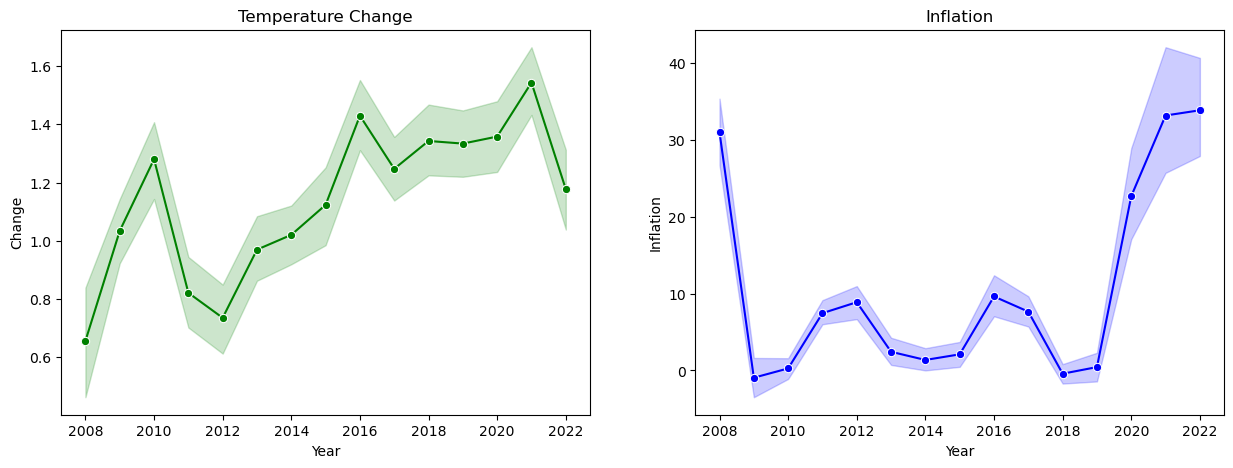

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Year', y='Change', ax=ax1, marker='o', color='g')
ax1.set_title('Temperature Change')
sns.lineplot(data=df, x='Year', y='Inflation', ax=ax2, marker='o', color='b')
ax2.set_title('Inflation')
plt.show()

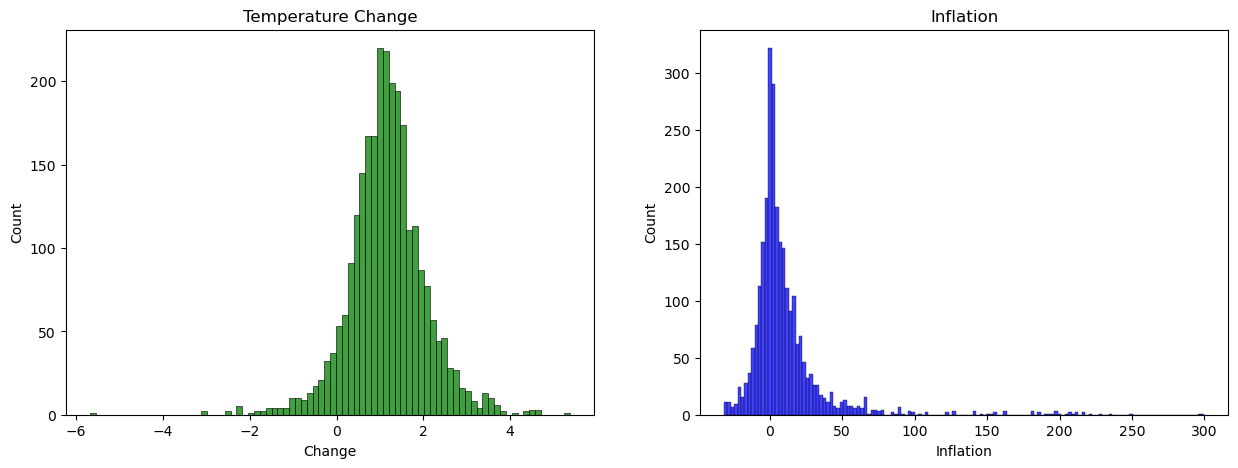

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x='Change', ax=ax1, color='g')
ax1.set_title('Temperature Change')
sns.histplot(data=df, x='Inflation', color='b')
ax2.set_title('Inflation')
plt.show()

### Inference for question 1:
We can draw the following inference from above graphs:
1. Temperature has decreased through the recent years, might be due to COVID.
2. Inflation has increased through the recent years.
3. Typical temperature change is around 1-2 degree celsius. The maximum temperature was around -6 degree.
4. Typical inflation is around 10-20%, while maximum inflation increases upto 300%.

### Question 2: What is the correlation between temperature change and food prices inflation globally?
To answer this question, we use a heatmap and pearson's r correlation coefficient to check if any of the variables have correlation amongst them. Pearson's r correlation coefficient can have value between -1 and +1. Where -1 is perfect negative correlation means if one variable's value increase, other's value decrease in the same magnitude. +1 is perfect positive correlation. The coefficient values closer 0 means the variables are the correlate with each other.

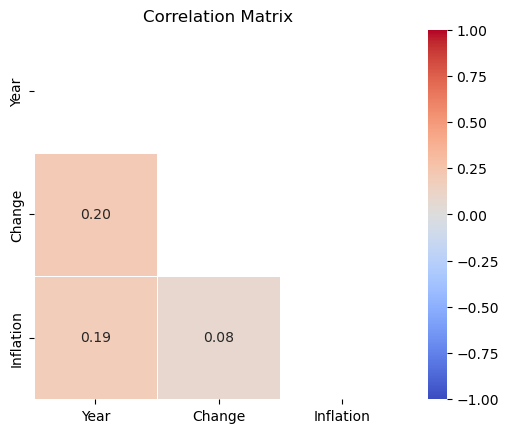

In [27]:
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm',
           mask=mask, square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Inference for question 2:
We can draw the following inference from the above graph :
1. There is no corrleation between temperature change and food prices inflation for all the countries combined.
2. Year also doesn't seem to have correlation with temperature change and food prices inflation.

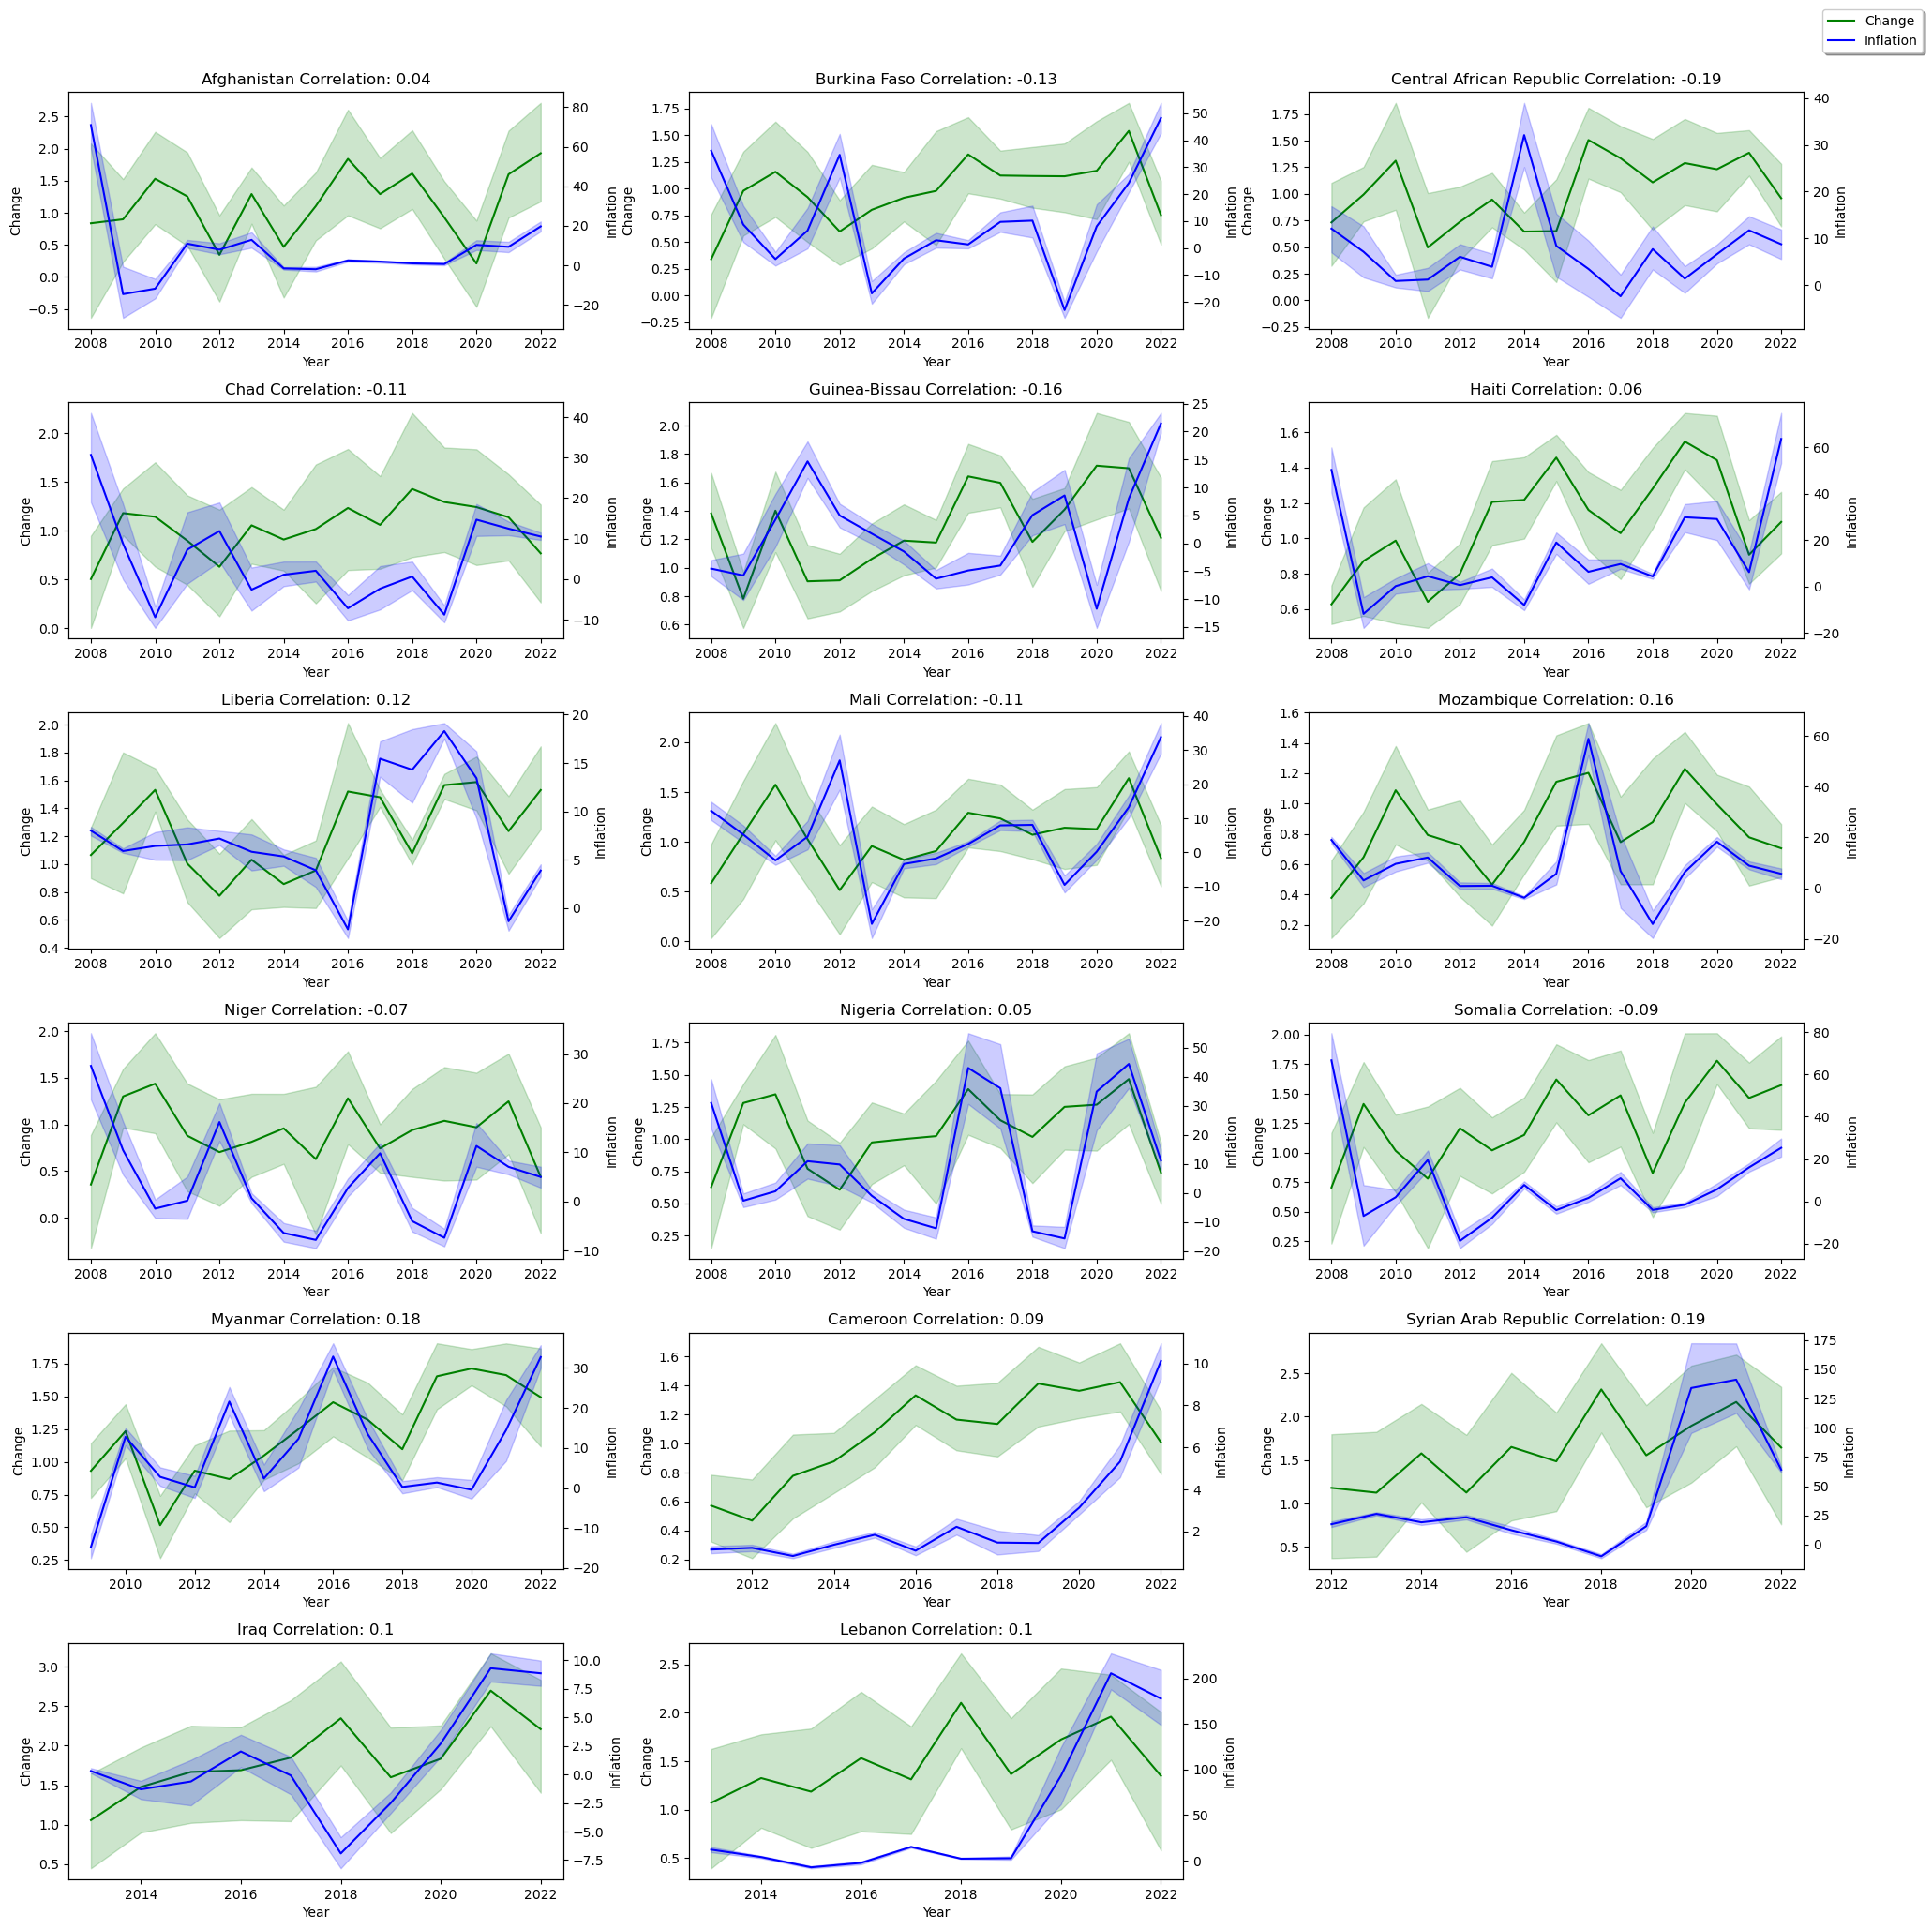

In [22]:
fig, axs = plt.subplots(6, 3, figsize=(20, 20))
axs = axs.reshape(-1)
for area, ax in zip(df['Area'].unique(), axs):
    sub = df[df['Area'] == area]
    ax = sns.lineplot(data=sub, x='Year', y='Change', ax=ax, label='Change', color='g', legend=False)
    ax2 = ax.twinx()

    sns.lineplot(data=sub, x='Year', y='Inflation', ax=ax2, label='Inflation', color='b', legend=False)
    corr = round(sub['Change'].corr(sub['Inflation']), 2)
    ax.set_title(f'{area} Correlation: {corr}')

fig.delaxes(axs[-1])
line = Line2D([0], [0], label='Change', color='g')
line2 = Line2D([0], [0], label='Inflation', color='b')

handles = [line, line2]

fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(1, 1.03),
          fancybox=True, shadow=True)
fig.tight_layout()
